In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\admin\Desktop\New folder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install Livelossplot
from livelossplot import PlotLossesKeras


C:\Users\admin\Desktop\New folder\Files_data.csv
C:\Users\admin\Desktop\New folder\File_data.csv
C:\Users\admin\Desktop\New folder\Final.csv
C:\Users\admin\Desktop\New folder\Finals.csv
C:\Users\admin\Desktop\New folder\Final_data.csv
C:\Users\admin\Desktop\New folder\MAMO.ipynb
C:\Users\admin\Desktop\New folder\MAMO_BCD.ipynb
C:\Users\admin\Desktop\New folder\.ipynb_checkpoints\MAMO-checkpoint.ipynb
C:\Users\admin\Desktop\New folder\.ipynb_checkpoints\MAMO_BCD-checkpoint.ipynb
C:\Users\admin\Desktop\New folder\dataset\all-mias.tar.gz
C:\Users\admin\Desktop\New folder\dataset\all_mias_scans.h5
C:\Users\admin\Desktop\New folder\dataset\Info.txt
C:\Users\admin\Desktop\New folder\dataset\all-mias\Info.txt
C:\Users\admin\Desktop\New folder\dataset\all-mias\Licence.txt
C:\Users\admin\Desktop\New folder\dataset\all-mias\mdb001.pgm
C:\Users\admin\Desktop\New folder\dataset\all-mias\mdb002.pgm
C:\Users\admin\Desktop\New folder\dataset\all-mias\mdb003.pgm
C:\Users\admin\Desktop\New folder\datas

In [3]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
# import xgboost as xgb

print("All modules have been imported")

All modules have been imported


In [4]:
info=pd.read_csv(r'C:\Users\admin\Desktop\New folder\dataset\Info.txt',sep=" ")
info=info.drop('Unnamed: 7',axis=1)
info.SEVERITY.fillna(0)

0      B
1      B
2      0
3      0
4      B
      ..
325    0
326    0
327    0
328    0
329    0
Name: SEVERITY, Length: 330, dtype: object

<AxesSubplot:ylabel='CLASS'>

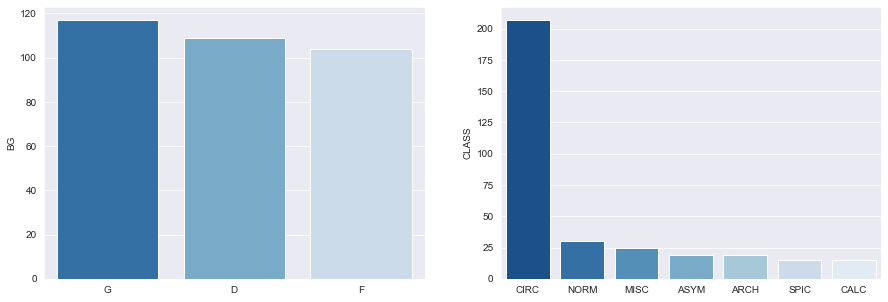

In [5]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=info.BG.unique(),y=info.BG.value_counts(),palette='Blues_r',ax=ax1)
sns.barplot(x=info.CLASS.unique(),y=info.CLASS.value_counts(),palette='Blues_r',ax=ax2)


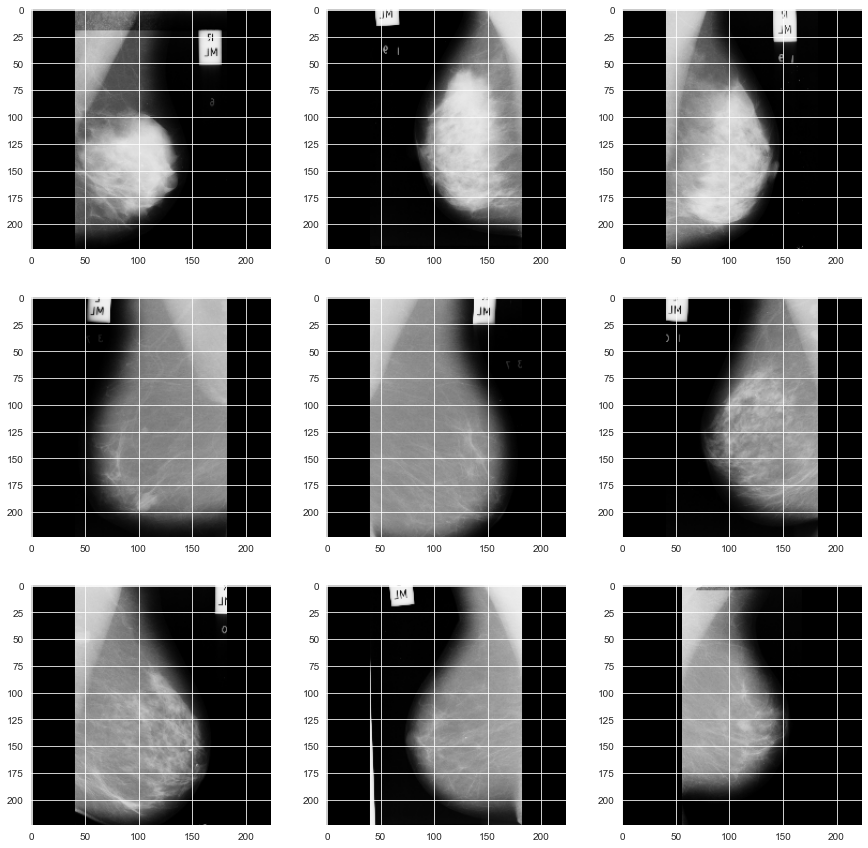

In [10]:
from PIL import Image
import glob
x= []
for filename in sorted(glob.glob(r"C:\Users\admin\Desktop\New folder\dataset\all-mias\*.pgm")): 
    img=cv2.imread(filename)
    img =cv2.resize(img,(224, 224))
    x.append(img)
fig=plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i])
plt.show()

In [18]:
# Image Augmentation
no_angles = 360
url = r"C:/Users/admin/Desktop/New folder/dataset/all-mias/"

def save_dictionary(path,data):
        print('saving catalog...')
        #open('u.item', encoding="utf-8")
        import json
        with open(path,'w') as outfile:
            json.dump(str(data), fp=outfile)
        # save to file:
        print(' catalog saved')

In [19]:
def read_image():
        print("Reading images")
        import cv2
        info = {}
        for i in range(322):
            if i<9:
                image_name='mdb00'+str(i+1)
            elif i<99:
                image_name='mdb0'+str(i+1)
            else:
                image_name = 'mdb' + str(i+1)
            image_address= url+image_name+'.pgm'
            img = cv2.imread(image_address,1)
            img = cv2.resize(img, (224,224))
            rows, cols,channel = img.shape
            info[image_name]={}
            for angle in range(0,no_angles,8):
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1) 
                img_rotated = cv2.warpAffine(img, M, (cols, rows))
                info[image_name][angle]=img_rotated
        return (info)

In [20]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)

def get_script_path():
    return os.path.dirname(os.path.realpath(sys.argv[0]))    

def read_lable():
    filename = url+'Info.txt'
    text_all = open(filename).read()
    #print(text_all)
    lines=text_all.split('\n')
    info={}
    for line in lines:
        words=line.split(' ')
        if len(words)>1:
            if (words[1] == 'G'):
                info[words[0]] = {}
                for angle in range(no_angles):
                    info[words[0]][angle] = 2
            if (words[1] == 'D'):
                info[words[0]] = {}
                for  angle in range(no_angles):
                    info[words[0]][angle] = 1
            if (words[1] == 'F'):
                info[words[0]] = {}
                for  angle in range(no_angles):
                    info[words[0]][angle] = 0
            
    return (info)

In [21]:
import numpy as np
lable_info=read_lable()
image_info=read_image()
ids=lable_info.keys() 
#del lable_info['Truth-Data:']
X=[]
Y=[]
for id in ids:
    for angle in range(0,no_angles,8):
        X.append(image_info[id][angle])
        Y.append(lable_info[id][angle])
X=np.array(X)
Y=np.array(Y)
Y=to_categorical(Y,3)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.3, random_state=42)
print(len(x_train),len(x_val),len(x_test))

Reading images
10143 3042 1305


In [22]:
#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
nClasses=3

In [23]:
base_Neural_Net= VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

for layer in base_Neural_Net.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 14s 0us/step


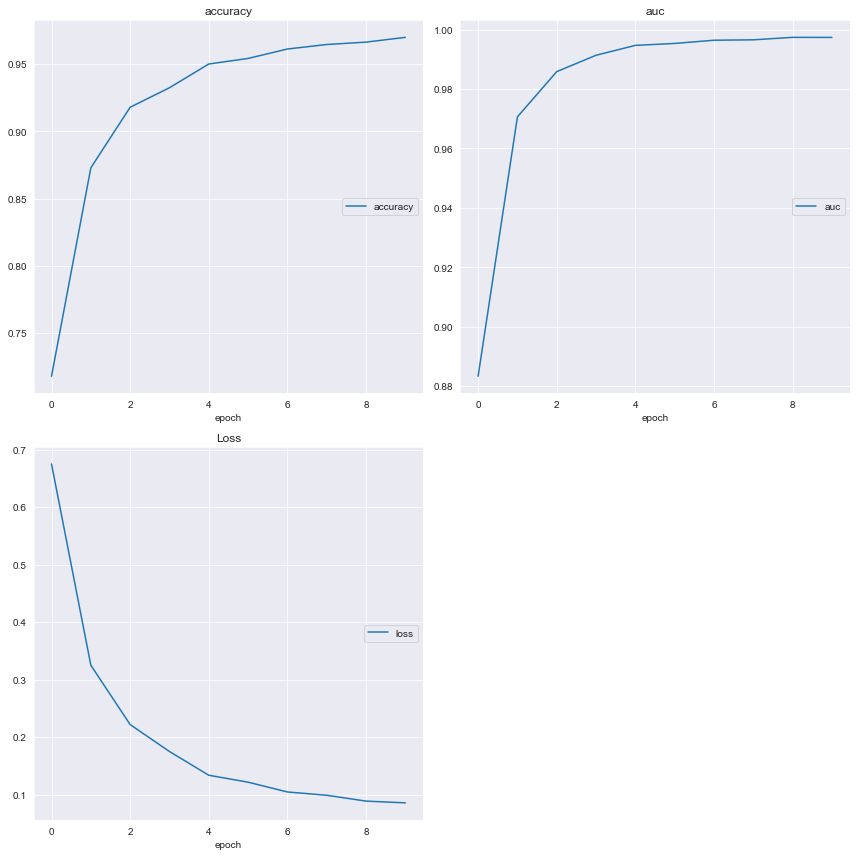

accuracy
	accuracy         	 (min:    0.718, max:    0.970, cur:    0.970)
auc
	auc              	 (min:    0.883, max:    0.997, cur:    0.997)
Loss
	loss             	 (min:    0.085, max:    0.675, cur:    0.085)
634/634 [==============================] - 1798s 3s/step - loss: 0.0855 - accuracy: 0.9698 - auc: 0.9974


In [24]:
c1=PlotLossesKeras()
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(x_train,y_train,epochs=10,callbacks=[c1,c3],batch_size=16)

In [25]:
model.evaluate(x_val,y_val,callbacks=[c2,c3],batch_size=16)

191/191 [==============================] - 855s 4s/step - loss: 0.1990 - accuracy: 0.9366 - auc: 0.9889


[0.19898653030395508, 0.9365549087524414, 0.9889170527458191]

In [26]:
print("Performance Report:")
y_pred8=model.predict_classes(x_test)
y_test8=[np.argmax(x) for x in y_test]
y_pred_prb8=model.predict_proba(x_test)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test8, y_pred8),4))
print('Precision score is :', np.round(metrics.precision_score(y_test8, y_pred8, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test8,y_pred8, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test8, y_pred8, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test8, y_pred_prb8,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test8, y_pred8),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test8, y_pred8,target_names=target))

Performance Report:
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
Accuracy score is : 0.9425
Precision score is : 0.9431
Recall score is : 0.9425
F1 Score is : 0.9427
ROC AUC Score is : 0.9908
Cohen Kappa Score: 0.9135
		Classification Report:
               precision    recall  f1-score   support

           G       0.96      0.94      0.95       392
           F       0.96      0.95      0.95       461
           D       0.91      0.94      0.93       452

    accuracy                           0.94      1305
   macro avg       0.94      0.94      0.94      1305
weighted avg       0.94      0.94      0.94      1305



In [27]:
model.save("MAMO_BCD.h5")

In [30]:
from tensorflow.keras.preprocessing import image
models=load_model("MAMO_BCD.h5")


(array([[5.1152122e-01, 4.8847717e-01, 1.6080101e-06]], dtype=float32), 51.1521, 'F')


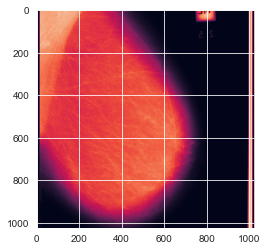

In [48]:
def predictor(filename) :
    test_image = filename
    image_result = Image.open(test_image)
    # test_image = image.load_img(test_image, target_size=(100,100))
    test_image = image.load_img(test_image, target_size=(224,224,3))
    test_image = image.img_to_array(test_image)
#     test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = models.predict(test_image)
    r = np.max(result)
    per = r*100
    percentage = round(per,4)
    categories = ['F','D','G']
    image_result = plt.imshow(image_result)
    output = categories[np.argmax(result)]
    return result,percentage,output


CANCER_DETECTOR = predictor(r'C:\Users\admin\Desktop\New folder\dataset\all-mias\mdb136.pgm')
print(CANCER_DETECTOR)

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25088)             100352    
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0